
### ANÁLISE ECONOMÉTRICA DO IMPACTO DA OFERTA DE ENERGIA ELÉTRICA E PETRÓLEO NA INFLAÇÃO NO BRASIL

#### 1. Introdução
A inflação é um fenômeno econômico que afeta diretamente o poder de compra da população e a estabilidade econômica de um país. No Brasil, a inflação tem sido uma preocupação constante, com variações significativas ao longo dos anos. Neste contexto, a oferta de energia elétrica e petróleo desempenha um papel crucial na formação dos preços, uma vez que esses insumos são fundamentais para a produção e o consumo de bens e serviços.
Neste trabalho, buscamos analisar o impacto da oferta de energia elétrica e petróleo na inflação no Brasil, utilizando dados mensais de 2000 a 2023. A análise será realizada por meio de modelos econométricos, com o objetivo de identificar a relação entre essas variáveis e a inflação, bem como avaliar a magnitude e a significância desse impacto.
#### 2. Metodologia
A metodologia adotada para a análise do impacto da oferta de energia elétrica e petróleo na inflação no Brasil envolve as seguintes etapas:
1. Coleta de dados: Serão coletados dados mensais de inflação (IPCA), oferta de energia elétrica e petróleo, entre outras variáveis relevantes, no período de 2000 a 2023.
2. Análise descritiva: Será realizada uma análise descritiva das variáveis, com o objetivo de identificar tendências, sazonalidades e possíveis outliers.
3. Testes de estacionariedade: Serão aplicados testes de estacionariedade (ADF, KPSS) para verificar se as séries temporais são estacionárias ou não.
4. Modelagem econométrica: Serão utilizados modelos econométricos, como ARIMA e VAR, para analisar a relação entre as variáveis e a inflação.
5. Análise de causalidade: Será realizada uma análise de causalidade de Granger para verificar se a oferta de energia elétrica e petróleo causam variações na inflação.
6. Interpretação dos resultados: Os resultados obtidos serão interpretados e discutidos, com o objetivo de entender a magnitude e a significância do impacto da oferta de energia elétrica e petróleo na inflação no Brasil.
7. Conclusões: Serão apresentadas as conclusões do trabalho, com sugestões para futuras pesquisas e implicações para a política econômica.
#### 3. Coleta de Dados
Os dados utilizados na análise foram coletados de fontes oficiais, como o Instituto Brasileiro de Geografia e Estatística (IBGE), ONS  - Operador Nacional do Sistema Elétrico e ANP -  Agência Nacional do Petróleo, Gás Natural e Biocombustíveis. As variáveis consideradas foram:
- Inflação (IPCA): 	Índice Nacional de Preços ao Consumidor - Amplo (IPCA) - Administrados, utilizado como medida da inflação no Brasil.
- Energia Elétrica armazenada: Capacidade de armazenamento de energia das bacias/reservatórios de todos os reservatórios cheios.
- Oferta de Óleo Bruto: Produção de petróleo no Brasil, medida em mil barris por dia.

##### 4. Análise Descritiva
A análise descritiva das variáveis foi realizada com o objetivo de identificar tendências, sazonalidades e possíveis outliers. A seguir, apresentamos gráficos e estatísticas descritivas das variáveis consideradas na análise.
```python

### 4.1 Análise de Distribuição das Variáveis

Análise da distribuição de cada variável do dataset para compreender melhor suas características.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhorar a visualização dos gráficos
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('Set2')
sns.set_context('talk')

In [2]:
df  = pd.read_parquet('dados.parquet')

In [3]:
df.head(5) 
df.tail(5)

,data,ear,u.m_ear,oleo_bruto,u.m_oleo,ipca_admin,u.m_ipca
295,2024-08-01,61.476806,percentual,3340,Barris/dia (mil),-0.12,percentual
296,2024-09-01,50.736338,percentual,3470,Barris/dia (mil),1.01,percentual
297,2024-10-01,47.900840,percentual,3269,Barris/dia (mil),0.71,percentual
298,2024-11-01,48.537575,percentual,3310,Barris/dia (mil),-0.87,percentual
299,2024-12-01,52.692861,percentual,3419,Barris/dia (mil),-0.17,percentual


In [4]:
# Verificar informações básicas do DataFrame
print("Informações do DataFrame:")
print(f"Shape: {df.shape}")
print("\nInformações das colunas:")
df.info()

Informações do DataFrame:
Shape: (300, 7)

Informações das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        300 non-null    datetime64[ns]
 1   ear         300 non-null    float64       
 2   u.m_ear     300 non-null    object        
 3   oleo_bruto  300 non-null    int64         
 4   u.m_oleo    300 non-null    object        
 5   ipca_admin  300 non-null    float64       
 6   u.m_ipca    300 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 16.5+ KB


In [5]:
# Estatísticas descritivas do DataFrame
print("Estatísticas descritivas:")
display(df.describe(exclude=['datetime64[ns]', 'object']).T)

Estatísticas descritivas:


,count,mean,std,min,25%,50%,75%,max
ear,300.0,60.751847,13.644838,30.028935,50.560811,60.566563,71.783052,87.47971
oleo_bruto,300.0,2195.160000,631.169277,1121.000000,1695.000000,2077.500000,2636.500000,3678.00000
ipca_admin,300.0,0.568800,0.867214,-4.350000,0.177500,0.405000,0.882500,4.29000


In [6]:
# Lista todas as colunas no DataFrame exceto a data (se houver)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exibir a lista de variáveis que serão analisadas
print(f"Variáveis numéricas disponíveis para análise: {numeric_columns}")

Variáveis numéricas disponíveis para análise: ['ear', 'oleo_bruto', 'ipca_admin']


In [7]:
def plot_variable_distribution(dataframe, variable):
    """
    Função para criar múltiplos gráficos de distribuição para uma variável
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Análise de Distribuição: {variable}', fontsize=16)
    
    # Histograma com curva de densidade
    sns.histplot(dataframe[variable], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Histograma com Curva de Densidade')
    axes[0, 0].set_xlabel(variable)
    axes[0, 0].grid(True)
    
    # Boxplot
    sns.boxplot(y=dataframe[variable], ax=axes[0, 1])
    axes[0, 1].set_title('Boxplot')
    axes[0, 1].set_ylabel(variable)
    axes[0, 1].grid(True)
    
    # QQ Plot para verificar normalidade
    from scipy import stats
    qq = stats.probplot(dataframe[variable].dropna(), dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('QQ Plot (Verificação de Normalidade)')
    axes[1, 0].grid(True)
    
    # Gráfico de violino
    sns.violinplot(y=dataframe[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Violin Plot')
    axes[1, 1].set_ylabel(variable)
    axes[1, 1].grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # Estatísticas descritivas específicas da variável
    print(f"\nEstatísticas descritivas para {variable}:")
    stats_df = pd.DataFrame({
        'Média': [dataframe[variable].mean()],
        'Mediana': [dataframe[variable].median()],
        'Desvio Padrão': [dataframe[variable].std()],
        'Variância': [dataframe[variable].var()],
        'Mínimo': [dataframe[variable].min()],
        'Máximo': [dataframe[variable].max()],
        'Assimetria': [dataframe[variable].skew()],
        'Curtose': [dataframe[variable].kurtosis()]
    })
    display(stats_df.T)
    
    # Verificar normalidade com teste estatístico
    print(f"\nTeste de Normalidade (Shapiro-Wilk) para {variable}:")
    shapiro_test = stats.shapiro(dataframe[variable].dropna())
    print(f"Estatística de teste: {shapiro_test[0]:.4f}")
    print(f"Valor p: {shapiro_test[1]:.4f}")
    if shapiro_test[1] < 0.05:
        print("Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).")
    else:
        print("Conclusão: A distribuição pode ser considerada normal (não rejeita hipótese nula).")


Análise de Distribuição para: ear


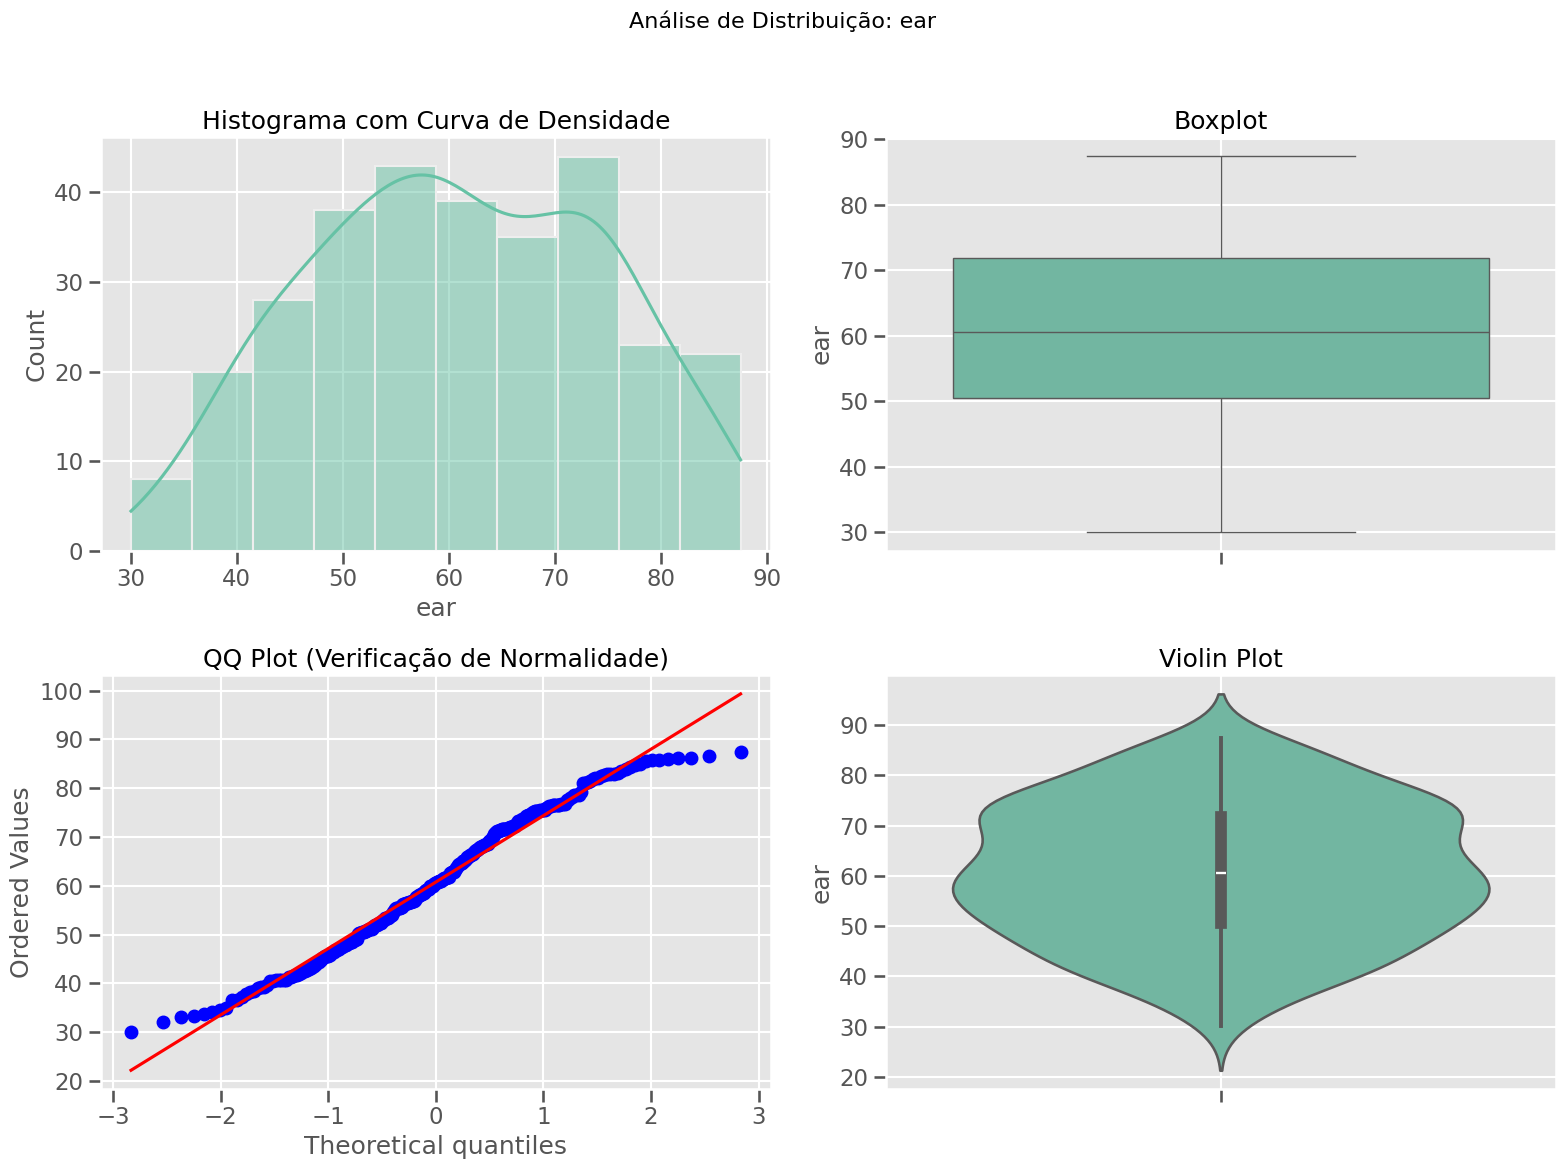


Estatísticas descritivas para ear:


,0
Média,60.751847
Mediana,60.566563
Desvio Padrão,13.644838
Variância,186.181591
Mínimo,30.028935
Máximo,87.479710
Assimetria,-0.039185
Curtose,-0.877915



Teste de Normalidade (Shapiro-Wilk) para ear:
Estatística de teste: 0.9806
Valor p: 0.0004
Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).

Análise de Distribuição para: oleo_bruto


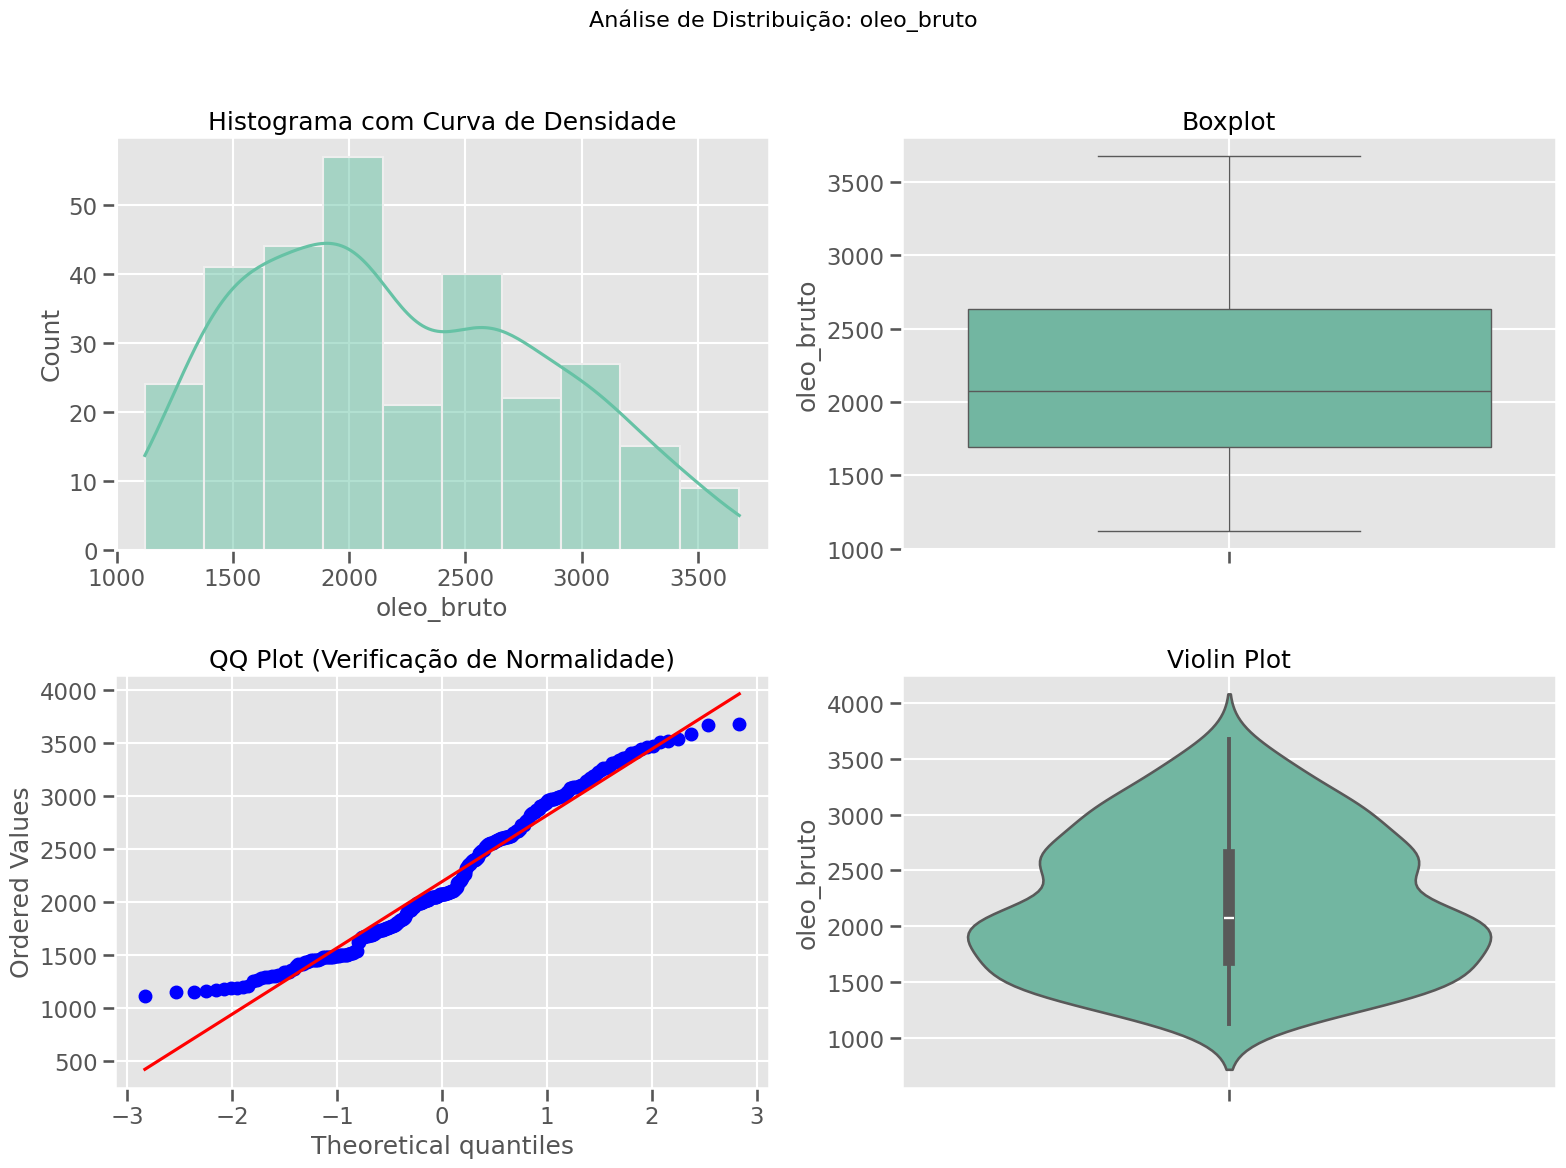


Estatísticas descritivas para oleo_bruto:


,0
Média,2195.160000
Mediana,2077.500000
Desvio Padrão,631.169277
Variância,398374.656589
Mínimo,1121.000000
Máximo,3678.000000
Assimetria,0.343534
Curtose,-0.850090



Teste de Normalidade (Shapiro-Wilk) para oleo_bruto:
Estatística de teste: 0.9636
Valor p: 0.0000
Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).

Análise de Distribuição para: ipca_admin


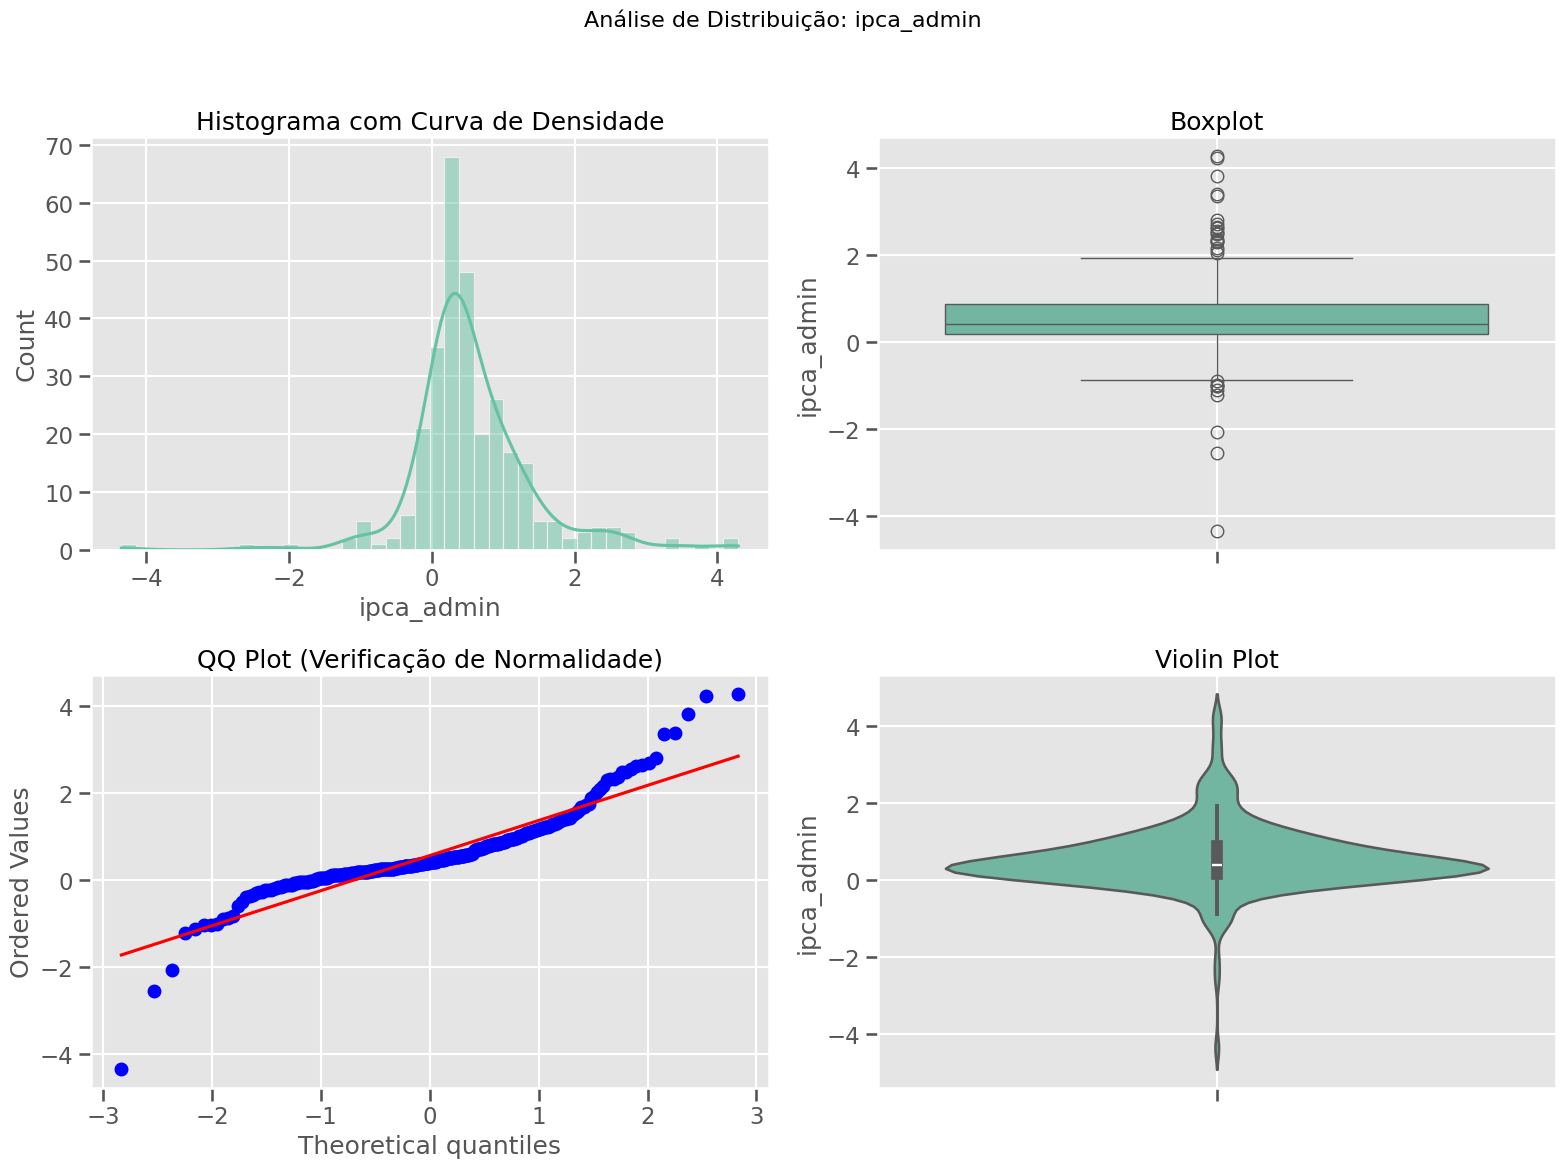


Estatísticas descritivas para ipca_admin:


,0
Média,0.568800
Mediana,0.405000
Desvio Padrão,0.867214
Variância,0.752059
Mínimo,-4.350000
Máximo,4.290000
Assimetria,0.416026
Curtose,6.664785



Teste de Normalidade (Shapiro-Wilk) para ipca_admin:
Estatística de teste: 0.8642
Valor p: 0.0000
Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).


In [8]:
# Loop para criar gráficos de distribuição para cada variável numérica
for column in numeric_columns:
    print(f"\n{'='*80}")
    print(f"Análise de Distribuição para: {column}")
    print(f"{'='*80}")
    plot_variable_distribution(df, column)